# Functional MRI Analysis: Anxiety Disorders

**Name**: Lisa-Maria Valeskini

**Date**: 18.11.2024

**Link to Neurosynth pages**:
- https://neurosynth.org/analyses/terms/anxiety%20disorders/

This notebook analyzes functional MRI data to identify brain regions associated with anxiety disorders.

### Locate MRI Data
The next code cell searches the specified directory for MRI files in `.nii.gz` format. The directory is defined per user input. Two types of files are identified:
- **Anatomical scans** (files with "anatomical" in their names).
- **Functional scans** (files with "uniformity" in their names).
This is because data downloaded from Neurosynth contains "anatomical" if it is an antomical scan and "uniformity" if it is functional data.

In [13]:
import os
import glob

# find all files with a .nii.gz extension in the directory specified by the user
source = input("Enter the directory path: ").strip()
file_ex = "*.nii.gz"
files = glob.glob(os.path.join(source, file_ex))

# if there are files with the .nii.gz extension, print the file names
if files:
    for file in files:
        print(file)
        #identify the anatomical and functional images
        if "anatomical" in os.path.basename(file):
            anatomical_img=file
        elif "uniformity" in os.path.basename(file):
            functional_img=file
    #check if anatomical and functional images are found
    if anatomical_img and functional_img:
        print("Anatomical and functional images found. Anatomical image: ", anatomical_img, "Functional image: ", functional_img)
    else:
        print("Anatomical and functional images not found.")
else:
    print("No files found")

anatomical.nii.gz
anxiety_disorders_uniformity-test_z_FDR_0.01.nii.gz
Anatomical and functional images found. Anatomical image:  anatomical.nii.gz Functional image:  anxiety_disorders_uniformity-test_z_FDR_0.01.nii.gz


### Visualize Functional Data on Anatomical Scan
The next code cell uses Nilearn's `plot_stat_map` function to lay functional data on top of anatomical scans. This function makes a figure showing strong associations of brain regions with the chosen psychological concept. The visualization includes:
- A customizable title. The user is asked about the name of the concept term and the title of the figure is adjusted addordingly
- A voxel threshold of 0.1 to exclude voxels below this level.
- Custom cut coordinates that best show the functional data specific to anxiety disorders.

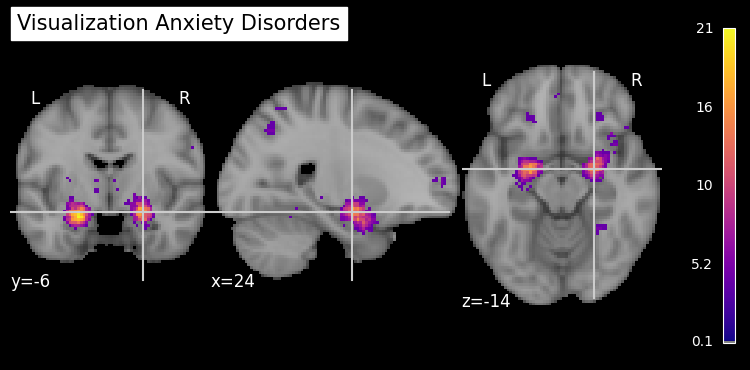

In [14]:

from nilearn import plotting

concept_term=input("What concept term would you like to visualize?").strip()

# PROPOSED CHANGE: customized coordinates
# Ask the user if they want to specify custom slice coordinates
use_custom_slices = input("Would you like to specify custom slice coordinates in 3D space? (yes/no): ").strip().lower()
if use_custom_slices == 'yes':
    try:
        x = float(input("Enter the x-coordinate for slicing: ").strip())
        y = float(input("Enter the y-coordinate for slicing: ").strip())
        z = float(input("Enter the z-coordinate for slicing: ").strip())
        cut_coords = (x, y, z)
    except ValueError:
        print("Invalid input. Using default slice coordinates.")
        cut_coords = (24, -6, -14)
else:
    cut_coords = (24, -6, -14)  # Default slice coordinates

# plotting functional image on top of anatomical image
plotting.plot_stat_map(stat_map_img=functional_img,bg_img=anatomical_img, threshold=0.1, cut_coords=cut_coords, cmap="plasma", title=f"Visualization {concept_term}")
plotting.show()

### Histogram of the Values in the Functional Data File
This cell creates a histogram of positive values from the functional MRI data. The functional data is loaded using Nibabel. The data is extracted from the functional data file. The code filters out values greater than 0 and only selects positive values. A histogram is plotted to show the distribution of voxel intensities. This helps to visualize the spread of activation values in the dataset. The title is already costumized based on the previous user input.

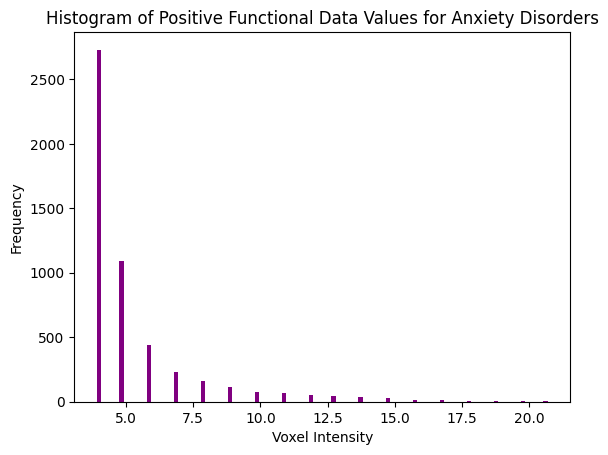

In [15]:

import matplotlib.pyplot as plt
import nibabel as nib
img = nib.load(functional_img)
#extracting data from the functional image
data = img.get_fdata()
#selecting only positive values
positive_values = data[data > 0]

# plotting the histogram and customizing the plot
plt.hist(positive_values, bins=100, color="purple")
plt.xlabel("Voxel Intensity")
plt.ylabel("Frequency")
plt.title(f"Histogram of Positive Functional Data Values for {concept_term}")
plt.show()